First few rows of the dataset:
   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week         country  salary  
0          2174             0        

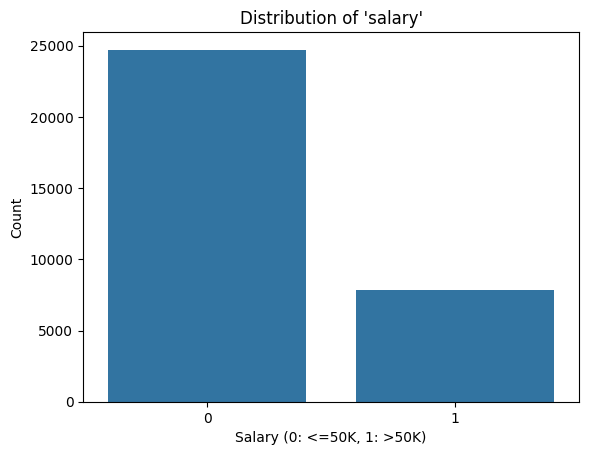


Correlation matrix:


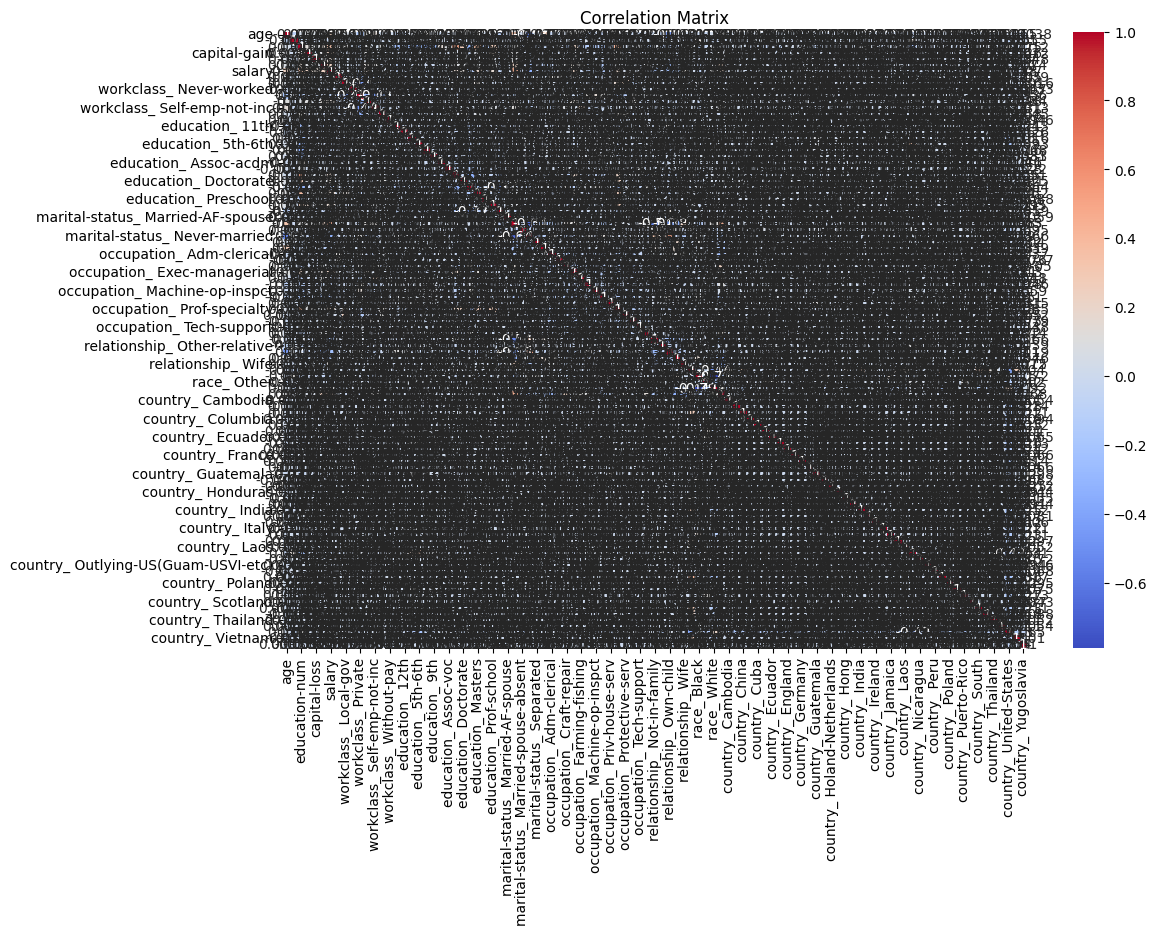

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Performance:
Accuracy: 0.8584
Precision: 0.7529
Recall: 0.6149
F1-Score: 0.6769

Decision Tree Performance:
Accuracy: 0.8170
Precision: 0.6165
Recall: 0.6384
F1-Score: 0.6273

Random Forest Performance:
Accuracy: 0.8595
Precision: 0.7492
Recall: 0.6276
F1-Score: 0.6831

Support Vector Machine Performance:
Accuracy: 0.8606
Precision: 0.7756
Recall: 0.5939
F1-Score: 0.6727

Prediction for the example data point: 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [7]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib

# Load the dataset
file_path = '/content/adult.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Display the summary statistics of the dataset
print("\nSummary statistics of the dataset:")
print(data.describe(include='all'))

# Display information about the dataset
print("\nInformation about the dataset:")
print(data.info())

# Check for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())

# Handle missing values (example: fill with mode)
for column in data.columns:
    if data[column].isnull().sum() > 0:
        data[column].fillna(data[column].mode()[0], inplace=True)

# Convert 'salary' to binary 0 and 1
data['salary'] = data['salary'].apply(lambda x: 1 if x.strip() == '>50K' else 0)

# List of categorical variables
categorical_vars = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'country']

# One-hot encode categorical variables
data = pd.get_dummies(data, columns=categorical_vars, drop_first=True)

# List of continuous variables
continuous_vars = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Initialize the scaler
scaler = StandardScaler()

# Scale continuous variables
data[continuous_vars] = scaler.fit_transform(data[continuous_vars])

# Define features (X) and target (y)
X = data.drop('salary', axis=1)
y = data['salary']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Exploratory Data Analysis (EDA)
# Plot the distribution of the target variable
print("\nDistribution of the target variable 'salary':")
sns.countplot(x=y)
plt.title("Distribution of 'salary'")
plt.xlabel("Salary (0: <=50K, 1: >50K)")
plt.ylabel("Count")
plt.show()

# Plot the correlation matrix
print("\nCorrelation matrix:")
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Model Development and Evaluation
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

# Train and evaluate models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

# Save the best model (example: Random Forest)
best_model = models['Random Forest']
joblib.dump(best_model, 'income_prediction_model.pkl')

# Load the saved model
loaded_model = joblib.load('income_prediction_model.pkl')

# Example of making a prediction with the loaded model
example_data = X_test.iloc[0].values.reshape(1, -1)
prediction = loaded_model.predict(example_data)
print(f"\nPrediction for the example data point: {prediction[0]}")
